In [1]:
from sim_diffusion import *
import numpy as np

## Provide the Parameters

In [2]:
# Parameters
n_samples = 5  # Number of different samples to generate
simsize = 33
bmax = 10000  # s/mm^2
bigDelta = 66e-3  # sec
smallDelta = 60e-3  # sec
gmax = 40e-3  # T/m
gamma = 2 * np.pi * 42.57e6  # Hz/T for proton
Dxx_base = 2e-9  # m^2/s

save_dir = 'data'

## Generate the samples

In [3]:
# Generate the samples
samples = generate_samples(save_dir, n_samples, simsize, bmax, bigDelta, smallDelta, gmax, gamma, Dxx_base)

100%|██████████| 5/5 [00:00<00:00, 289.97it/s]

(33, 33, 33)
(33, 33, 33)
(33, 33, 33)
(33, 33, 33)
(33, 33, 33)
(33, 33, 33)
(33, 33, 33)
(33, 33, 33)
(33, 33, 33)
(33, 33, 33)


## Load the samples from the directory

In [4]:
x = data_loader('data')
print(x[0][0].shape)

(33, 33, 33)


## Plot the r-space signal

1005494.193742938
Number of zeros in r-space data: 0
Number of infinities in r-space data: 0
Number of NaNs in r-space data: 0
(33, 33, 33)


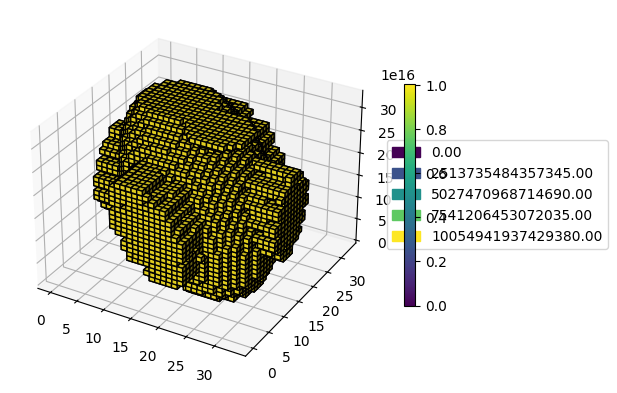

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'rspace' is a 33x33x33 numpy array containing the r-space data
# An example random r-space data for illustration
rspace = x[3][0]
th = np.max(rspace)*1e-10
print(th)

# Create np array where values are 1 if rspace > th, 0 otherwise
fill = np.zeros(rspace.shape)
fill[rspace > th] = 1

# Count number of zeros in the r-space data
print(f'Number of zeros in r-space data: {np.sum(rspace == 0)}')
print(f'Number of infinities in r-space data: {np.sum(np.isinf(rspace))}')
print(f'Number of NaNs in r-space data: {np.sum(np.isnan(rspace))}')
print(rspace.shape)

# Plot the r-space data
norm = Normalize(vmin=rspace.min(), vmax=rspace.max())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.voxels(filled=fill, facecolors=plt.cm.viridis(rspace), edgecolors='k')

# Create a colorbar with the viridis colormap
mappable = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis)
mappable.set_array([])
plt.colorbar(mappable, ax=ax, shrink=0.6)

# Create legend patches
legend_patches = [Patch(color=plt.cm.viridis(norm(value)), label=f'{value:.2f}') for value in np.linspace(rspace.min(), rspace.max(), num=5)]
# Add legend to plot
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
